In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
from scipy.stats import kruskal, wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 5.5.4 Challenge
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?




In [2]:
ess_df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
ess_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
ess_df.nunique()

cntry         6
idno       3086
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64


**1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample. **




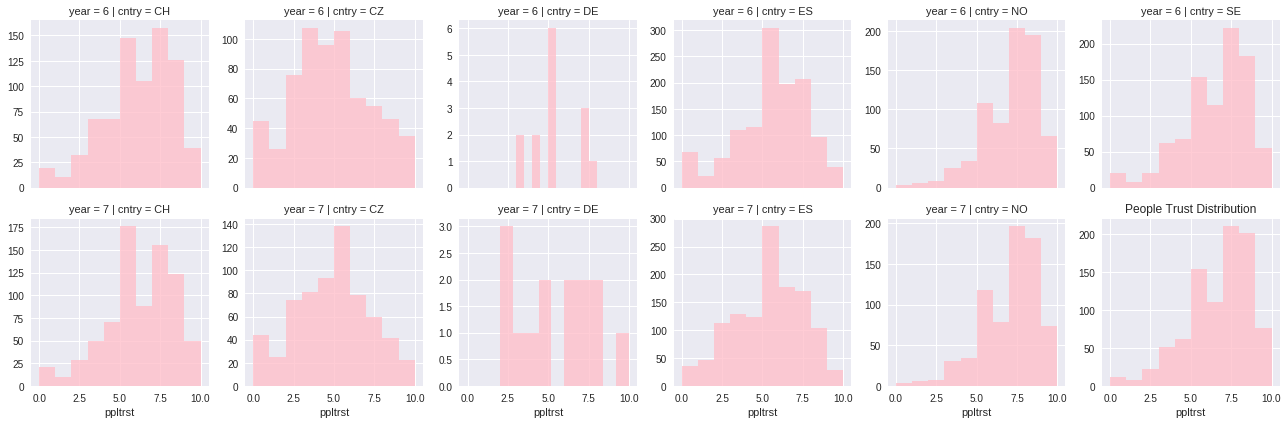

Shapiro Tests for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715775847434998, 1.8777941424019673e-09)

DE 6 (0.8929166197776794, 0.10693283379077911)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292040467262268, 7.928973676032161e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [4]:
# Plotting histograms of trust vs country vs each year
g = sns.FacetGrid(ess_df, row='year', col='cntry',  dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8, color='pink')
#plt.title("People Trust Distribution")
plt.show()

# Normality through Shapiro test
cntrys = list(ess_df.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_df[ess_df.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].ppltrst))
    print()

In [5]:
# Wilcoxon Signed Rank Test due to non normality.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_df[ess_df.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].ppltrst, 
                        y=ess_temp[ess_temp.year == 7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)



/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Looks like there is significant change in trust for countries Spain and Sweden



<br>
<br>




**2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.**

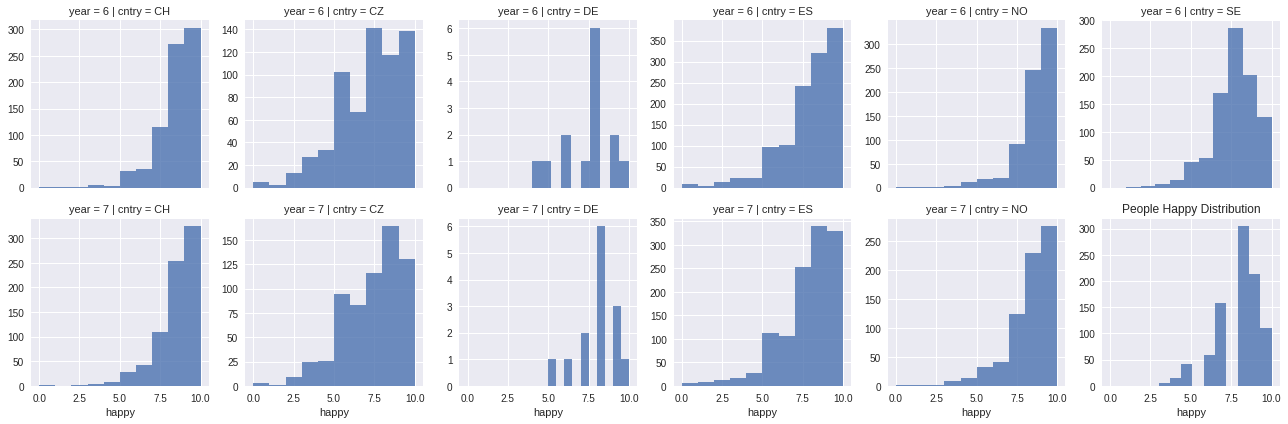

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

DE 6 (0.9160983562469482, 0.22210942208766937)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.912103533744812, 5.600742285549146e-22)



In [6]:
# Plotting histograms of happy vs country vs each year
g = sns.FacetGrid(ess_df, row='year', col='cntry',  dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8)
#plt.title("People Happy Distribution")
plt.show()

# Normality through Shapiro test
cntrys = list(ess_df.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_df[ess_df.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].happy))
    print()

In [7]:
# Wilcoxon Signed Rank Test due to non normality.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_df[ess_df.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].happy, 
                        y=ess_temp[ess_temp.year == 7].happy))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)



/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Countries  Norway, Czech Republic and Spain have significant difference in happiness trends. <br> <br>
**3. Who reported watching more TV in 2012, men or women?**

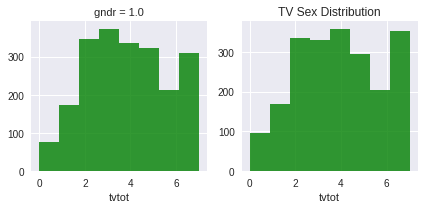

Males : (0.9434293508529663, 5.994494507539187e-28)
Females : (0.9390434622764587, 8.488309331265169e-29)
No of Males:  2151
No of Females:  2140


In [8]:
ess_12 = ess_df[ess_df.year==6]

# Plotting histograms of tv vs sex 
g = sns.FacetGrid(ess_12, col='gndr',  dropna=True, sharey=False)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='green',bins=8)
#plt.title("TV Sex Distribution")
plt.show()
# Printing Shapiro test results
print('Males :', shapiro(ess_12[ess_12.gndr ==1].tvtot.dropna()))
print('Females :', shapiro(ess_12[ess_12.gndr ==2].tvtot.dropna()))
print('No of Males: ',ess_12[ess_12.gndr == 1].tvtot.dropna().count())
print('No of Females: ',ess_12[ess_12.gndr == 2].tvtot.dropna().count())

In [9]:
# Printing Wilcoxon Test for TV watching across genders
print('Wilcoxon Test:', wilcoxon(ess_12[ess_12.gndr == 1].tvtot.dropna()[:2140], 
                                 y=ess_12[ess_12.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


So there is no significant difference between Male and Female tv watching for year 2012.
<br><br>
**4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?**

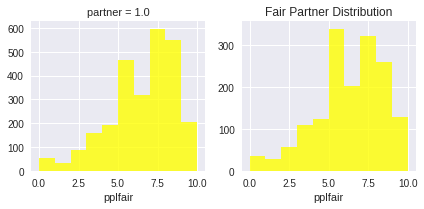

Partner : (0.9410251975059509, 2.4778057341886867e-31)
Alone : (0.9561690092086792, 1.4302870646482291e-21)
No of people with partner:  2663
No of people alone:  1608


In [11]:
# Plotting histograms of fairness vs partner
g = sns.FacetGrid(ess_12, col='partner',  dropna=True, sharey=False)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='yellow')
#plt.title("Fair Partner Distribution")
plt.show()
# Printing Shapiro test results
print('Partner :', shapiro(ess_12[ess_12.partner ==1].pplfair.dropna()))
print('Alone :', shapiro(ess_12[ess_12.partner ==2].pplfair.dropna()))
print('No of people with partner: ',ess_12[ess_12.partner == 1].pplfair.dropna().count())
print('No of people alone: ',ess_12[ess_12.partner == 2].pplfair.dropna().count())

In [12]:
# Printing Wilcoxon Test for fairness in relationship
print('Wilcoxon Test:', wilcoxon(ess_12[ess_12.partner == 1].pplfair.dropna()[:1608], 
                                 y=ess_12[ess_12.partner == 2].pplfair.dropna()))

print('Median Fairness for People living with Partners:', ess_12[ess_12.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', ess_12[ess_12.partner == 2].pplfair.median())

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)
Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0


There is significant difference between fairness in people living with partners compared to people living alone for 2012
<br><br>
**5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?**

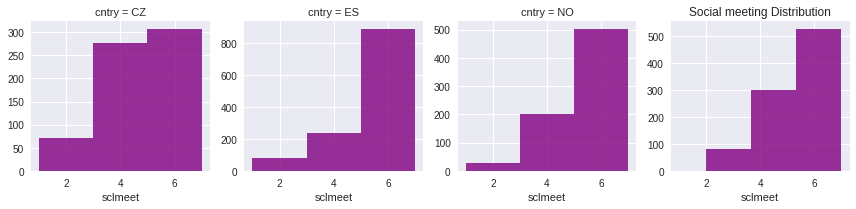

Shapiro Tests for Normality
CZ (0.9451602101325989, 7.663770300607355e-15)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)

SE (0.8798282146453857, 6.682967662559975e-26)



In [13]:
ess_14 = ess_df[(ess_df.cntry.isin (['NO','ES','CZ','SE'])) & (ess_df.year==7)]

# Plotting histograms of tv vs sex 
g = sns.FacetGrid(ess_14, col='cntry',  dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='purple',bins=3)
#plt.title("Social meeting Distribution")
plt.show()
# Printing Shapiro test results
cntrys = list(ess_14.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(ess_14[ess_14.cntry ==cnt].sclmeet.dropna()))
    # Printing Shapiro test results
    print()

In [14]:
# Printing Kruskal test statistic
print(kruskal(ess_14[ess_14.cntry == 'CZ'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'ES'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'NO'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclmeet.dropna()))

KruskalResult(statistic=199.91509305978323, pvalue=4.400563536291911e-43)


In [15]:
#Significant difference between social meet for all 4 countries
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_14[ess_14.cntry == 'CZ'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(ess_14[ess_14.cntry == 'CZ'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'NO'].sclmeet.dropna()))
print('CZ vs SE:', ttest_ind(ess_14[ess_14.cntry == 'CZ'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(ess_14[ess_14.cntry == 'ES'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'NO'].sclmeet.dropna()))
print('ES vs SE:', ttest_ind(ess_14[ess_14.cntry == 'ES'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclmeet.dropna()))
print('NO vs SE:', ttest_ind(ess_14[ess_14.cntry == 'NO'].sclmeet.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclmeet.dropna()))

CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
CZ vs SE: Ttest_indResult(statistic=-13.471687937687198, pvalue=3.252593934148172e-39)
ES vs NO: Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
ES vs SE: Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
NO vs SE: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)


Spain and Norway doesn't seem significantly different along with Norway and Sweden. Looks like Czech Republic is completely different from all other 3 countries. 
<br><br>
**6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?**

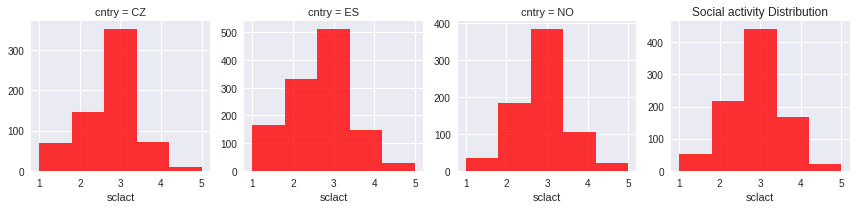

Shapiro Tests for Normality
CZ (0.8517600893974304, 3.2631608025549396e-24)

ES (0.892457902431488, 5.746904176126056e-28)

NO (0.8678725957870483, 2.398206966061988e-24)

SE (0.8822488784790039, 1.283228571387991e-25)



In [16]:
# Plotting histograms of tv vs sex 
g = sns.FacetGrid(ess_14, col='cntry',  dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='red', bins=5)
#plt.title("Social activity Distribution")
plt.show()
# Printing Shapiro test results
cntrys = list(ess_14.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(ess_14[ess_14.cntry ==cnt].sclact.dropna()))
    # Printing Shapiro test results
    print()

In [17]:
# Printing Kruskal test statistic
print(kruskal(ess_14[ess_14.cntry == 'CZ'].sclact.dropna(),
             ess_14[ess_14.cntry == 'ES'].sclact.dropna(),
             ess_14[ess_14.cntry == 'NO'].sclact.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclact.dropna()))

KruskalResult(statistic=53.809701709377876, pvalue=1.2319673584021775e-11)


In [18]:
#Significant difference between social activity for all 4 countries
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_14[ess_14.cntry == 'CZ'].sclact.dropna(),
             ess_14[ess_14.cntry == 'ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(ess_14[ess_14.cntry == 'CZ'].sclact.dropna(),
             ess_14[ess_14.cntry == 'NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(ess_14[ess_14.cntry == 'CZ'].sclact.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclact.dropna()))
print('ES vs NO:', ttest_ind(ess_14[ess_14.cntry == 'ES'].sclact.dropna(),
             ess_14[ess_14.cntry == 'NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(ess_14[ess_14.cntry == 'ES'].sclact.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclact.dropna()))
print('NO vs SE:', ttest_ind(ess_14[ess_14.cntry == 'NO'].sclact.dropna(),
             ess_14[ess_14.cntry == 'SE'].sclact.dropna()))

CZ vs ES: Ttest_indResult(statistic=1.9231457887987455, pvalue=0.05461649785517343)
CZ vs NO: Ttest_indResult(statistic=-3.44673561169421, pvalue=0.0005844634540645623)
CZ vs SE: Ttest_indResult(statistic=-4.0018841917465595, pvalue=6.580214302799725e-05)
ES vs NO: Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
ES vs SE: Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
NO vs SE: Ttest_indResult(statistic=-0.4823216270234106, pvalue=0.6296421272017451)


Looks like there is no significant difference between the social activites of Norway and Sweden. But all other pairs have good difference